In [1]:
import pandas as pd

In [2]:
#Dataset: "Buyers Profiles/Train_data.csv"
#Import both test and training data
train = pd.read_csv("Train_data.csv", header=0)
test = pd.read_csv("Test_data.csv", header=0)


In [3]:
##print train.info()
train.shape
test.shape


(6, 3)

In [4]:
# Building the tree model.
# the data have string values we need to convert them into numerica values
train['Gender'] = train['Gender'].map( {'Male': 1, 'Female': 0} ).astype(int)
train['Bought'] = train['Bought'].map({'Yes':1, 'No':0}).astype(int)


In [5]:
test['Gender'] = test['Gender'].map( {'Male': 1, 'Female': 0} ).astype(int)
test['Bought'] = test['Bought'].map({'Yes':1, 'No':0}).astype(int)

##print train.info()
##print test.info()

In [6]:
from sklearn import tree

#Defining Features and lables
features = list(train.columns[:2])

X_train = train[features]
y_train = train['Bought']

In [7]:
#X_train

X_test = test[features]
y_test = test['Bought']

In [8]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [10]:
#Plotting the trees
#Unfortunately drawing a beautiful tree is not easy in python, Still
#you will need to install pydot
#use this command in your anaconda prompt: conda install -c anaconda pydot=1.0.28
from IPython.display import Image
from six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file = dot_data,
                     feature_names = features,
                     filled=True, rounded=True,
                     impurity=False)

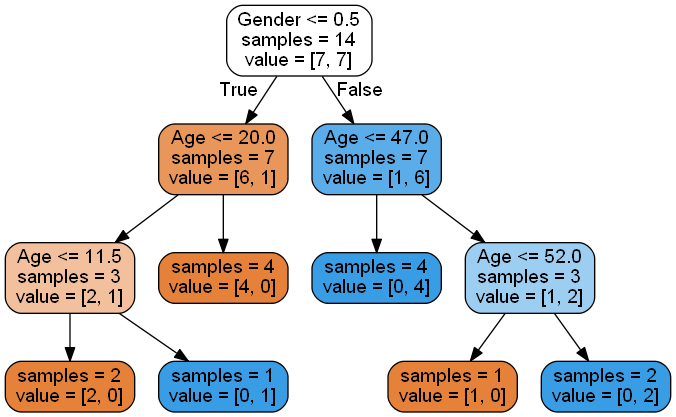

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [12]:
predict1 = clf.predict(X_train)
print(predict1)

[1 1 1 0 0 1 1 1 0 0 0 1 0 0]


In [13]:
predict2 = clf.predict(X_test)
print(predict2)

[0 0 0 1 1 1]


In [14]:
####Calculation of Accuracy and Confusion Matrix
#on the train data
from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm1 = confusion_matrix(y_train,predict1)
cm1
total1 = sum(sum(cm1))

In [15]:
#####from confusion matrix calculate accuracy
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
accuracy1

1.0

In [19]:
#On Test Data
cm2 = confusion_matrix(y_test,predict2)
cm2
total2 = sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
accuracy2

0.16666666666666666

In [20]:
#####from confusion matrix calculate accuracy
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
accuracy2


0.16666666666666666

# LAB: Pruning


In [21]:
### hyper parameters : Before creating the model ,we pass some values 
### model parameters : after creating the model

In [22]:
#We will rebuild a new tree by using above data and see how it works by tweeking the parameteres we have..
dtree = tree.DecisionTreeClassifier(max_leaf_nodes = 10, 
                                    min_samples_leaf = 5, 
                                    max_depth= 5)

In [23]:
dtree.fit(X_train,y_train)

predict3 = dtree.predict(X_train)
predict4 = dtree.predict(X_test)


In [24]:
#Accuracy of the model that we created with modified model parameters.
#on the train data
from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm1 = confusion_matrix(y_train,predict3)
cm1
total1 = sum(sum(cm1))

In [25]:
#####from confusion matrix calculate accuracy
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
accuracy1


0.8571428571428571

In [26]:
#On Test Data
cm2 = confusion_matrix(y_test,predict4)
cm2
total2 = sum(sum(cm2))